# Oikos Data Investigation
<br>
This is an initial investigation into two data sets provided by Oikos. 
<br>
<br>The data looks at the impact of training for individuals and households in Northern Mozambique to enact positive change in terms of their financial situation. The focus of this investigation is to look into the data quality and see what cleaning is required, undertaking an initial analysis, as well as considering the potential for merging both data sets.
<br>
<br>However, on exploration, there are several problems with the data that need to be addressed. There are a number of discrepancies, internally with the information held across both data sets, and with the data when validating externally. As a result, significant further cleaning is required, such as geographical mapping, and further consultation with Oikos to clarify translations and potentially missing data.

<br>Let's first import packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import nan, isnan

The data is split into two data sets, let's look at the first.

In [40]:
path = r"C:\Users\Barna\Desktop\Oikos Data\REFP 03_Data final_21Dez2021_for CorrelAid.xlsx"
data_old = pd.read_excel(path)
#print(data.head())

The first thing to notice is that the column titles are Portuguese, fortunately a translation has been provided. Let's rename the columns using this. We need to do this first as it is hard to spot any glaring errors without understanding what is contained in the data. Let's check the length to make sure they match. 

In [41]:
sheet = "Variables"
translation_data = pd.read_excel(path, sheet)
columns = list(translation_data["Meaning"])
print(len(columns))
print(len(data_old.columns))

66
66


Now let's rename the columns with their English translation.

In [42]:
data_old.columns = columns
#print(data.head)

Let's also import the other data set as we want to merge these at some point and so it is helpful to be able to understand what is contained in both. This data set also has Portuguese names too and though there is a translation, unfortunately this doesn't map exactly as the "picture URL" field has been left blank. We can edit the initial excel file must faster than creating a mapping dictionary and so, for the purpose of initial exploratory analysis we can do this, then import the data and translate the column titles below. 

In [43]:
path = r"C:\Users\Barna\Desktop\Oikos Data\REFP10_v2_graduaçao2_Ago2022_for Correlaid.xlsx"
data_recent = pd.read_excel(path)
sheet = "Variables"
translation_data = pd.read_excel(path, sheet)
translation_data.columns = ["Portuguese", "Type", "English"]
columns = list(translation_data["English"])
columns2 = [x for x in columns if str(x) != 'nan']
# print(columns2)
# print(data_recent.columns)
data_recent.columns = columns2
# print(data.head())

Now we can begin investigating cleaning issues, let's look at the data across both sets, from left to right columns investigating issues and highlighting any obvious issues below:
<br>
<br>The first issue seems to be with the "Start" column as this doesn't match across data sets. The "Start" column in the first data does not have a corresponding "End" date as in the second data set, which makes these columns:
<br>
<br>a) Difficult to merge
<br>b) Difficult to provide contextual analysis on as this "Start" and "End" date refer to engagement in the Oikos programme. 
<br>
<br>In the second data set there is a column: "Nível de estudos finalizados" with an English translation of:
<br>"Academics: 
<br>Sem estudos=Without studies(non literated)
<br>Alfabetizaçao concluída (Adult alphabetization done)
<br>Até 4ª classe concluída (4 years completed)
<br>Até 7ª classe concluída (7 year completed)
<br>Até 10ª classe concluída (10 years completed)
<br>Mais de 10ª classe ou ensino técnico (more than 10 years or technical studies)" 
<br>This column is not present in the first data set.
<br>
<br>The further we get through these two datasets it is clear that there is a big disparity between recorded data across both. The main difference is that the second data set has clear markers for participation in the programme grouped together and called:
<br>
<br>GRADUATION STEP: 01 PARTICIPATION
<br>GRADUATION STEP: 02 BUSINESS PLAN
<br>GRADUATION STEP: 03 SAVINGS
<br>GRADUATION STEP: 04 BUSINESS START UP
<br>GRADUATION STEP: 05 LIFE IMPROVEMENT
<br> 
<br>This grouping, and the values contained within seem to mostly not be apparent in the first data set. There is also a discrepancy between the first data set, containing "deficiency" columns, that are not apparent in the second data set. This seems significant information as it talks about the socio-economic situation of participants of the programme as well as other contextual information.This isn't an issue for every row (indicating an individual) in the dataset as many are present across both, however there are cases where we have rows only present in the first data set with no further information corresponding in the second, more informative data set.
<br>
<br>Merging these two data sets is thus going to be really difficult due to there being a discrepancy in the information contained within. Essentially one data set seems to be taking a record of a a group of individual's current situation, whereas the other is providing data on the impact of interventions for a different group of individuals. This would not be an issue to have different information, but as they occasionally cover different time periods and participants it is difficult to draw conclusions covering both. 
<br>
<br>This will need to be discussed in the next meeting with Oikos. 

# First Data Set
<br>
For now, lets undertake some initial exploratory analysis of each data set in turn to explore data quality and potential concerns. Let's first explore the first data set and look at what columns may be important that we can explore for quality. Let's check:
<br>
<br>Geographical quality - do place names match to external locations 
<br>Numeric quality - any outliers or inappropriate nulls
<br>Deficiency columns - what do these indicate? This granularity has been lost in the translation and may be significant.

In [44]:
# print(data_old.columns)

There are three identified localities that are translate to "Admin level 5" in the data set. Let's check that the mapping of these fits with external data.

In [45]:
value_counts = data_old["Admin level 5"].value_counts()
print(value_counts)

Meluluca           191
Choulue            184
Milamba            142
Caramaja Napome    107
Muaja              102
Cholue              98
Salaua              90
Metoro              87
Mecolene            81
Maueia              71
Chissaua            71
Meculane            13
Lutuesse             3
Nassupia             3
Chissimbere          2
Negoro               2
Calipo sede          2
Nahopa               2
Nacuia               1
Muaria               1
Nathuco              1
Milapane             1
Nampui               1
Massangulo sede      1
Cava                 1
Mutivaze             1
Lissiete sede        1
Nailocone            1
Cazuzu               1
Nacocolo             1
Chamba               1
Mulhaniua            1
Namiwi               1
Lurio sede           1
Name: Admin level 5, dtype: int64


Let's now import external geographical data to check that this list matches. Our external data set is taken from the Humanitarian Data Exchange and provides geographical information we need: https://data.humdata.org/dataset/cod-ab-moz 

In [46]:
external_geo = pd.read_excel(r"C:\Users\Barna\Desktop\Oikos Data\moz_adminboundaries_tabulardata.xlsx")
external_admin = external_geo["admin3Name_pt"]

Now let's check to see if there are values present and whether these need to be changed. We can also strip whitespace to ensure this doesn't cause problems with our matching. Another issue is the level of "admin" that is required. The external data set defines this level of data as level 3, but the Oikos data similar place names as level 5. 

In [47]:
stripped_old = data_old["Admin level 5"].str.strip()
external_admin = external_admin.str.strip()
difference = set(stripped_old) - set(external_admin)
print(len(difference))

34


So, only one value matches our external data set. From a quick look at some of the above table, we can see that the values contained within the value_counts table are present in the external data set but have slightly different naming. A mapping dictionary thus needs to be made. After this we can then see if the lat/lon data matches to enable choropleths and other visuals.

In [ ]:
# geo mapping dictionary

Now let's look at the geographical data for the other data set and see how this matches. 

In [48]:
stripped_recent = data_recent["Admin Level 4 (Locality)"].str.strip()
# print(len(stripped_recent))
difference = set(stripped_recent) - set(external_admin)
print(len(difference))

16


So this list matches far closer with only 16 values to change in the mapping dictionary, let's change this now before looking at lat/lon matches, by creating a mapping dictionary.

In [ ]:
# geo mapping dictionary

Finally for Geographical data cleaning we need to check the postal admin information and ensure that this is accurate. 

In [ ]:
# postal admin column cleaning

After this we can start to look at some of the values contained within the data set. The first data set provides information on:
<br>
<br>1) Information about an individual such as location, name, age and sex.
<br>2) Information about this individual's economic situation such as different sources of income
<br>3) Information about this individual's social and healthcare circumstances, such as disability and whether they have experienced war.

For some initial exploratory analysis we can: 
<br> 
<br>1) Look at the proportion of individuals based on their location
<br>2) Explore individuals by their economic situation and see which types of income are most highly represented
<br>3) Look at a specific social/healthcare circumstance and see if this is linked to their location

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Meluluca'),
  Text(1, 0, 'Choulue'),
  Text(2, 0, 'Milamba'),
  Text(3, 0, 'Caramaja Napome'),
  Text(4, 0, 'Muaja'),
  Text(5, 0, 'Cholue'),
  Text(6, 0, 'Salaua'),
  Text(7, 0, 'Metoro'),
  Text(8, 0, 'Mecolene'),
  Text(9, 0, 'Maueia')])

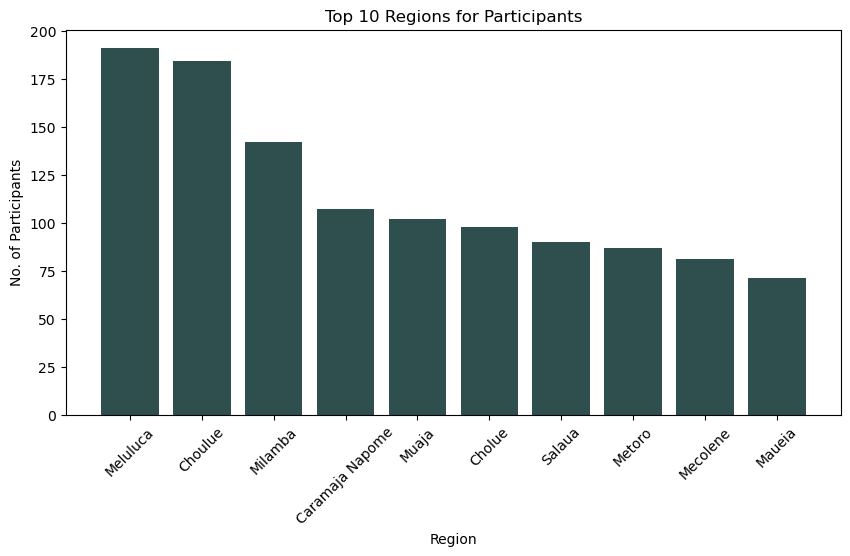

In [49]:
value_counts = data_old["Admin level 5"].value_counts()
location_df = pd.DataFrame(value_counts).reset_index()
location_df.columns = ["Region", "Count"]
fig = plt.figure(figsize = (10, 5))
plt.bar(x = location_df["Region"].head(10), height = location_df["Count"].head(10), color = "darkslategrey")
plt.xlabel("Region")
plt.ylabel("No. of Participants")
plt.title("Top 10 Regions for Participants")
plt.xticks(rotation=45)


Text(0.5, 1.1, 'Proportion of Main Source of Income')

<Figure size 1000x500 with 0 Axes>

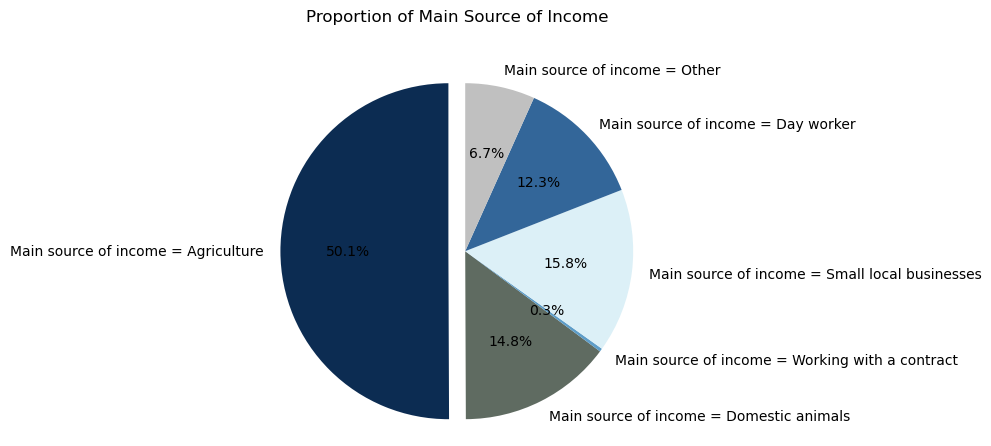

In [50]:
#print(data_old.columns)
income_type_columns = ['Main source of income = Agriculture', 
                       'Main source of income = Domestic animals',      
                       'Main source of income = Working with a contract',
                       'Main source of income = Small local businesses',
                       'Main source of income = Day worker', 
                       'Main source of income = Other']
income_df = data_old[income_type_columns].sum()
income_df2 = pd.DataFrame(income_df).reset_index()
income_df2.columns =["Income Type", "Sum"]
fig = plt.figure(figsize = (10, 5))
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['#0C2C52','#5F6B61','#5E9DC8','#DCF0F7', '#336699', '#C0C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(income_df2["Sum"], explode=explode, labels=income_df2["Income Type"], colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Main Source of Income", y=1.10)

In order to identify the specific social/healthcare circumstance we need an accurate translation from Oikos. 

In [ ]:
# social/healthcare cirucmstance visuals

# Second Data Set
Now we can look at the second data set and conduct an initial exploratory analysis. Alongside undertaking geographical cleaning, let's look at: 
<br>
<br>1) Individuals with a family
<br>2) Life improvement variables 
<br>3) IPM health indicators 

In [67]:
# Geographical cleaning

In [70]:
# Individuals with a family visual

In [71]:
# Life improvement visual

In [ ]:
# IMP health indicator visuals

# Merge data sets
<br>
<br>Following discussion with the team it was highlighted that both spreadsheets can be merged on the "code of beneficiary" column, though there are codes not present in both. Let's do this now. 
<br>
<br>1) Select and clean column titles
<br>2) Merge on "code" column
<br>3) Check merge is accurate

In [61]:
old_columns = ["Code of Beneficiary: 5 numbers (ZDBBB = Z (Zone number), D(District number), BBB (Beneficiary within that district)",
               'Number of chickens in th HH\nPosible categories (as in the next 5 questions): 1-5/6-10/>10',
               'Number of cows in th HH',
               'Number of ducks in th HH',
               'Number of goats in th HH',
               'Number of rabbits in th HH']

data_old_selected = data_old[old_columns]
data_old_selected = data_old_selected.rename(columns={'Code of Beneficiary: 5 numbers (ZDBBB = Z (Zone number), D(District number), BBB (Beneficiary within that district)': 'Beneficiary Code',
                                                      'Number of chickens in th HH\nPosible categories (as in the next 5 questions): 1-5/6-10/>10': 'Chicken',
                                                      'Number of cows in th HH': "Cows",
                                                      'Number of ducks in th HH': "Ducks",
                                                      'Number of goats in th HH': "Goats",
                                                      'Number of ducks in th HH': "Ducks",
                                                      'Number of rabbits in th HH': "Rabits"})

recent_columns = ["Beneficiary Code",
                  "Chicken",
                  "Goats",
                  "Cows",
                  "Ducks",
                  "Rabits"]

data_recent_selected = data_recent[recent_columns]

In [75]:
result = pd.concat([data_recent_selected, data_old_selected], axis=1).reindex(data_recent_selected.index)
print(result)
print(len(result))
print(len(data_old)+len(data_recent))

      Beneficiary Code Chicken Goats Cows Ducks Rabits  Beneficiary Code  \
0              21019.0     >10   1-5  NaN   NaN    NaN             31204   
1              21029.0     >10   NaN  NaN   NaN    NaN             31203   
2              21009.0     >10  6-10  NaN   NaN    NaN             31101   
3              21025.0    6-10   NaN  NaN   NaN    NaN             31200   
4              21021.0     NaN   NaN  NaN   1-5    NaN             23068   
...                ...     ...   ...  ...   ...    ...               ...   
1443           23209.0     1-5   NaN  NaN   NaN    NaN             25140   
1444           23263.0     NaN   NaN  NaN   NaN    NaN             35169   
1445           22259.0    6-10   NaN  NaN   NaN    NaN             35167   
1446           22377.0    6-10   NaN  NaN   NaN    NaN             35168   
1447           22252.0     >10   NaN  NaN   NaN    NaN             35065   

     Chicken Cows Ducks Goats Rabits  
0        1-5  NaN   NaN   NaN    NaN  
1        

From this we can see that there are only 1448 rows that are available across both, a big difference with the number of rows contained in both data sets, though this may not be an issue for the deliverables that 

# Key Questions
<br>
<br> What are the key indicators that Oikos would find helpful/wants to know
<br> Can we have a translation for healthcare information if this is included